# Chapter One: Defining the Question

> Kira Plastinina is a Russian brand that is sold through a defunct chain of retail stores in Russia, Ukraine, Kazakhstan, Belarus, China, Philippines, and Armenia. The brand’s Sales and Marketing team would like to understand their customer’s behavior from data that they have collected over the past year. More specifically, they would like to learn the characteristics of customer groups.

## Specific Objective
To learn the characteristics of customer groups by:

* EDA of the data.

* Perform clustering stating insights drawn from analysis and visualizations.

* Put out comparisons between the approaches learned this week i.e. K-Means clustering vs Hierarchical clustering highlighting the strengths and limitations of each approach in the context of your analysis.

* Provide a comprehensive conclusion and recommendation

## Metric for Success

The following are what will determine the success of my study:

* To get insight from all the variables in our dataset.
* Perform clustering of customers on their attributes
* Representation of groups and customers in each graphically

## Understanding the context

To scale efficiently and effectively, expansion stage companies need to focus their efforts not on a broad universe of potential customers, but rather on a specific subset of customers who are most similar to their best current customers. The key to doing so is through customer segmentation.

customer segmentation (also known as market segmentation) is the division of potential customers in a given market into discrete groups. That division is based on customers having similar enough:

1. Needs, i.e., so that a single whole product can satisfy them.

2. Buying characteristics, i.e., responses to messaging, marketing channels, and sales channels, that a single go-to-market approach can be used to sell to them competitively and economically.

## Experimental Design

- Data Cleaning
- Univariate Analysis
- Bivariate Analysis
- Feature Engineering
- Unsupervised Machine Learning
- K- Means Clustering
- Heirarchical Clustering

# Section Two: Loading Libraries and Previewing the dataset

In [ ]:
#Load r extension 
%load_ext rpy2.ipython

/usr/local/lib/python3.6/dist-packages/rpy2/robjects/pandas2ri.py:14: FutureWarning: pandas.core.index is deprecated and will be removed in a future version.  The public classes are available in the top-level namespace.
  from pandas.core.index import Index as PandasIndex
/usr/local/lib/python3.6/dist-packages/rpy2/robjects/pandas2ri.py:34: UserWarning: pandas >= 1.0 is not supported.
  warnings.warn('pandas >= 1.0 is not supported.')


In [ ]:
%%R
#Installing the data table package
install.packages("data.table", dependencies=TRUE)
library(tidyr)
library(tidyverse)

#Installing the visualization package;ggplot2 and the corrplot
install.packages("ggplot2", dependencies=TRUE)
install.packages("corrplot", dependencies=TRUE)

# Compute descriptive statistics
install.packages("pastecs")
library(pastecs)
# Compute descriptive statistics
install.packages("psych")
library(psych)

library(gridExtra)
library(grid)
library(ggplot2)
library(lattice)

#Visualizing the Correlation Matrix.
install.packages("corrplot", dependencies=TRUE)
library(corrplot)

install.packages('factoextra')
library(factoextra)

install.packages("hrbrthemes")
library(hrbrthemes)

Streaming output truncated to the last 5000 lines.
✔ tibble  3.0.3     ✔ stringr 1.4.0
✔ readr   1.3.1     ✔ forcats 0.5.0
✔ purrr   0.3.4     

R[write to console]: ── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()

R[write to console]: Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

R[write to console]: also installing the dependencies ‘png’, ‘jpeg’, ‘checkmate’, ‘matrixStats’, ‘RcppArmadillo’, ‘e1071’, ‘fontBitstreamVera’, ‘fontLiberation’, ‘httpuv’, ‘xtable’, ‘sourcetools’, ‘fastmap’, ‘Formula’, ‘latticeExtra’, ‘gridExtra’, ‘htmlTable’, ‘viridis’, ‘sp’, ‘mvtnorm’, ‘TH.data’, ‘sandwich’, ‘SparseM’, ‘MatrixModels’, ‘conquer’, ‘classInt’, ‘units’, ‘diffobj’, ‘fontquiver’, ‘freetypeharfbuzz’, ‘shiny’, ‘ggplot2movies’, ‘hexbin’, ‘Hmisc’, ‘mapproj’, ‘maps’, ‘maptools’, ‘multcomp’, ‘profvis’, ‘quantreg’, ‘rgeos’, ‘sf’, ‘vdiffr’


R[write to console

In [ ]:
%%R
df <- read.csv('online_shoppers_intention.csv')
#Previewing the first six entries
head(df)


  Administrative Administrative_Duration Informational Informational_Duration
1              0                       0             0                      0
2              0                       0             0                      0
3              0                      -1             0                     -1
4              0                       0             0                      0
5              0                       0             0                      0
6              0                       0             0                      0
  ProductRelated ProductRelated_Duration BounceRates ExitRates PageValues
1              1                0.000000  0.20000000 0.2000000          0
2              2               64.000000  0.00000000 0.1000000          0
3              1               -1.000000  0.20000000 0.2000000          0
4              2                2.666667  0.05000000 0.1400000          0
5             10              627.500000  0.02000000 0.0500000          0
6         

In [ ]:
%%R
#Previewing the last six entries
tail(df)

      Administrative Administrative_Duration Informational
12325              0                       0             1
12326              3                     145             0
12327              0                       0             0
12328              0                       0             0
12329              4                      75             0
12330              0                       0             0
      Informational_Duration ProductRelated ProductRelated_Duration BounceRates
12325                      0             16                 503.000 0.000000000
12326                      0             53                1783.792 0.007142857
12327                      0              5                 465.750 0.000000000
12328                      0              6                 184.250 0.083333333
12329                      0             15                 346.000 0.000000000
12330                      0              3                  21.250 0.000000000
       ExitRates PageValues

In [ ]:
%%R
# get column names
colnames(df)

 [1] "Administrative"          "Administrative_Duration"
 [3] "Informational"           "Informational_Duration" 
 [5] "ProductRelated"          "ProductRelated_Duration"
 [7] "BounceRates"             "ExitRates"              
 [9] "PageValues"              "SpecialDay"             
[11] "Month"                   "OperatingSystems"       
[13] "Browser"                 "Region"                 
[15] "TrafficType"             "VisitorType"            
[17] "Weekend"                 "Revenue"                


In [ ]:
%%R
#this will  give us the shape of the dataframe
dim(df)

[1] 12330    18


In [ ]:
%%R
#Checking for column names and datatypes

str(df)

'data.frame':	12330 obs. of  18 variables:
 $ Administrative         : int  0 0 0 0 0 0 0 1 0 0 ...
 $ Administrative_Duration: num  0 0 -1 0 0 0 -1 -1 0 0 ...
 $ Informational          : int  0 0 0 0 0 0 0 0 0 0 ...
 $ Informational_Duration : num  0 0 -1 0 0 0 -1 -1 0 0 ...
 $ ProductRelated         : int  1 2 1 2 10 19 1 1 2 3 ...
 $ ProductRelated_Duration: num  0 64 -1 2.67 627.5 ...
 $ BounceRates            : num  0.2 0 0.2 0.05 0.02 ...
 $ ExitRates              : num  0.2 0.1 0.2 0.14 0.05 ...
 $ PageValues             : num  0 0 0 0 0 0 0 0 0 0 ...
 $ SpecialDay             : num  0 0 0 0 0 0 0.4 0 0.8 0.4 ...
 $ Month                  : Factor w/ 10 levels "Aug","Dec","Feb",..: 3 3 3 3 3 3 3 3 3 3 ...
 $ OperatingSystems       : int  1 2 4 3 3 2 2 1 2 2 ...
 $ Browser                : int  1 2 1 2 3 2 4 2 2 4 ...
 $ Region                 : int  1 1 9 2 1 1 3 1 2 1 ...
 $ TrafficType            : int  1 2 3 4 4 3 3 5 3 2 ...
 $ VisitorType            : Factor w/ 3 levels "Ne

In [ ]:
%%R
#Checking for the data summaries
summary(df)


 Administrative   Administrative_Duration Informational   
 Min.   : 0.000   Min.   :  -1.00         Min.   : 0.000  
 1st Qu.: 0.000   1st Qu.:   0.00         1st Qu.: 0.000  
 Median : 1.000   Median :   8.00         Median : 0.000  
 Mean   : 2.318   Mean   :  80.91         Mean   : 0.504  
 3rd Qu.: 4.000   3rd Qu.:  93.50         3rd Qu.: 0.000  
 Max.   :27.000   Max.   :3398.75         Max.   :24.000  
 NA's   :14       NA's   :14              NA's   :14      
 Informational_Duration ProductRelated   ProductRelated_Duration
 Min.   :  -1.00        Min.   :  0.00   Min.   :   -1.0        
 1st Qu.:   0.00        1st Qu.:  7.00   1st Qu.:  185.0        
 Median :   0.00        Median : 18.00   Median :  599.8        
 Mean   :  34.51        Mean   : 31.76   Mean   : 1196.0        
 3rd Qu.:   0.00        3rd Qu.: 38.00   3rd Qu.: 1466.5        
 Max.   :2549.38        Max.   :705.00   Max.   :63973.5        
 NA's   :14             NA's   :14       NA's   :14             
  Bounce

# Chapter Three: Data Cleaning

## Validity

In [ ]:
%%R
#Replacing column headings for better and faster analysis
df<-df %>% 
  rename(
    administrative = Administrative, 
    administrative_duration = Administrative_Duration,
    informational = Informational,
    informational_duration = Informational_Duration, 
    productrelated = ProductRelated,
    productrelated_duration = ProductRelated_Duration,
    bouncerates  = BounceRates,
    exitrates = ExitRates, 
    pagevalues = PageValues,
    specialday = SpecialDay,
    month = Month, 
    operatingsystems = OperatingSystems,
    browser = Browser,
    region = Region,
    traffictype = TrafficType,
    visitortype = VisitorType,
    weekend = Weekend,
    revenue = Revenue
  )
#Previewing change in coumn names 
colnames(df)

 [1] "administrative"          "administrative_duration"
 [3] "informational"           "informational_duration" 
 [5] "productrelated"          "productrelated_duration"
 [7] "bouncerates"             "exitrates"              
 [9] "pagevalues"              "specialday"             
[11] "month"                   "operatingsystems"       
[13] "browser"                 "region"                 
[15] "traffictype"             "visitortype"            
[17] "weekend"                 "revenue"                


## Completeness

In [ ]:
%%R
#identifying missing data using is.na()function
is.na(df)
#Checking number of missing values
length(which(is.na(df)))

[1] 112


In [ ]:
%%R
#Checking the missing values in our columns
colSums(is.na(df))

         administrative administrative_duration           informational 
                     14                      14                      14 
 informational_duration          productrelated productrelated_duration 
                     14                      14                      14 
            bouncerates               exitrates              pagevalues 
                     14                      14                       0 
             specialday                   month        operatingsystems 
                      0                       0                       0 
                browser                  region             traffictype 
                      0                       0                       0 
            visitortype                 weekend                 revenue 
                      0                       0                       0 


Since there are 112 missing values, we will drop entries with misiing values to ensure completeness in our dataset

In [ ]:
%%R
df <- na.omit(df)
sum(is.na(df))

[1] 0


The data is complete since there are no null values

## Consistency

In [ ]:
%%R
# Finding the duplicated rows in the dataset df 
# and assign to a variable duplicated_rows below
duplicated_rows <- df[duplicated(df),]
duplicated_rows

      administrative administrative_duration informational
159                0                       0             0
179                0                       0             0
419                0                       0             0
457                0                       0             0
484                0                       0             0
513                0                       0             0
555                0                       0             0
590                0                       0             0
660                0                       0             0
775                0                       0             0
873                0                       0             0
890                0                       0             0
923                0                       0             0
948                0                       0             0
975                0                       0             0
1035               0                       0            

We will not remove the duplicated rows since the entries are different in other variables

## Uniformity

In [ ]:
%%R
#Checking if we  have correct data types  for our variables
str(df)

'data.frame':	12316 obs. of  18 variables:
 $ administrative         : int  0 0 0 0 0 0 0 1 0 0 ...
 $ administrative_duration: num  0 0 -1 0 0 0 -1 -1 0 0 ...
 $ informational          : int  0 0 0 0 0 0 0 0 0 0 ...
 $ informational_duration : num  0 0 -1 0 0 0 -1 -1 0 0 ...
 $ productrelated         : int  1 2 1 2 10 19 1 1 2 3 ...
 $ productrelated_duration: num  0 64 -1 2.67 627.5 ...
 $ bouncerates            : num  0.2 0 0.2 0.05 0.02 ...
 $ exitrates              : num  0.2 0.1 0.2 0.14 0.05 ...
 $ pagevalues             : num  0 0 0 0 0 0 0 0 0 0 ...
 $ specialday             : num  0 0 0 0 0 0 0.4 0 0.8 0.4 ...
 $ month                  : Factor w/ 10 levels "Aug","Dec","Feb",..: 3 3 3 3 3 3 3 3 3 3 ...
 $ operatingsystems       : int  1 2 4 3 3 2 2 1 2 2 ...
 $ browser                : int  1 2 1 2 3 2 4 2 2 4 ...
 $ region                 : int  1 1 9 2 1 1 3 1 2 1 ...
 $ traffictype            : int  1 2 3 4 4 3 3 5 3 2 ...
 $ visitortype            : Factor w/ 3 levels "Ne

In [ ]:
%%R
#checking for unique values in the variables
lapply(df, function (x) {length(unique(x))})

$administrative
[1] 27

$administrative_duration
[1] 3336

$informational
[1] 17

$informational_duration
[1] 1259

$productrelated
[1] 311

$productrelated_duration
[1] 9552

$bouncerates
[1] 1872

$exitrates
[1] 4777

$pagevalues
[1] 2704

$specialday
[1] 6

$month
[1] 10

$operatingsystems
[1] 8

$browser
[1] 13

$region
[1] 9

$traffictype
[1] 20

$visitortype
[1] 3

$weekend
[1] 2

$revenue
[1] 2



## Outliers

In [ ]:
%%R
admin <- df$administrative
admin_dur<- df$administrative_duration
info <- df$informational
info_dur <- df$informational_duration
prod<- df$productrelated
prod_dur<- df$productrelated_duration
bounce<- df$bouncerates
exit<- df$exitrates
page<- df$pagevalues
specialday<- df$specialday
os<- df$operatingsystems
browser <- df$browser
region<- df$region
traffictype<- df$traffictype


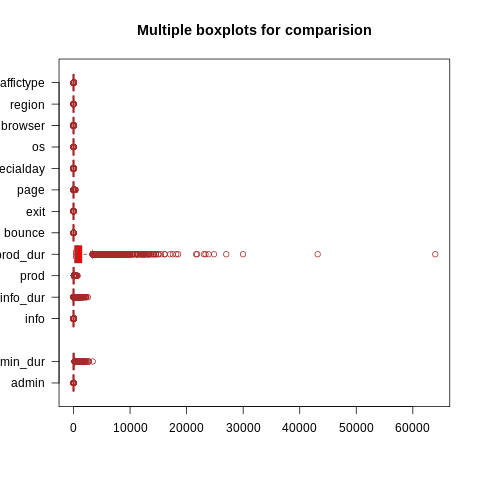

In [ ]:
%%R
#Checking for outliers in our numerical columns
boxplot(admin, admin_dur, info, info_dur,prod, prod_dur, bounce, exit, page,specialday, os, browser, region, traffictype,
main = "Multiple boxplots for comparision",
at = c(1,2,4,5, 6,7 ,8 ,9, 10, 11, 12, 13, 14,15),
names = c("admin", "admin_dur", "info", "info_dur", "prod","prod_dur", "bounce", "exit","page","specialday", "os","browser", "region", "traffictype"),
las = 1,
col = c("orange","red"),
border = "brown",
horizontal = TRUE,
notch = FALSE
)

* The variables traffic type, region, os, specialday, exit, bounce, info and admin have no outliers.
* The variables page, product duration, product , info_dur, and admin_dur have outliers. we will not remove the outliers since it will be helpful in clustering

In [ ]:
%%R
# Creating a copy of the cleaned dataframe
clean_df = data.table::copy(df)

# Chapter Four: Univariate Analysis

## Measures of central tendancies

In [ ]:
%%R
#Selecting the numeric variables
df_num<-df %>% select_if(is.numeric)
head(df_num)

  administrative administrative_duration informational informational_duration
1              0                       0             0                      0
2              0                       0             0                      0
3              0                      -1             0                     -1
4              0                       0             0                      0
5              0                       0             0                      0
6              0                       0             0                      0
  productrelated productrelated_duration bouncerates exitrates pagevalues
1              1                0.000000  0.20000000 0.2000000          0
2              2               64.000000  0.00000000 0.1000000          0
3              1               -1.000000  0.20000000 0.2000000          0
4              2                2.666667  0.05000000 0.1400000          0
5             10              627.500000  0.02000000 0.0500000          0
6         

In [25]:
%%R
res <- stat.desc(df_num)
round(res, 2)

             administrative administrative_duration informational
nbr.val            12316.00                12316.00      12316.00
nbr.null            5754.00                 5857.00       9686.00
nbr.na                 0.00                    0.00          0.00
min                    0.00                   -1.00          0.00
max                   27.00                 3398.75         24.00
range                 27.00                 3399.75         24.00
sum                28546.00               996440.47       6207.00
median                 1.00                    8.00          0.00
mean                   2.32                   80.91          0.50
SE.mean                0.03                    1.59          0.01
CI.mean.0.95           0.06                    3.12          0.02
var                   11.04                31279.61          1.61
std.dev                3.32                  176.86          1.27
coef.var               1.43                    2.19          2.52
          

## Measures of Dispersion

In [26]:
%%R
# Compute descriptive statistics
describe(df_num)

                        vars     n    mean      sd median trimmed    mad min
administrative             1 12316    2.32    3.32   1.00    1.63   1.48   0
administrative_duration    2 12316   80.91  176.86   8.00   42.19  11.86  -1
informational              3 12316    0.50    1.27   0.00    0.18   0.00   0
informational_duration     4 12316   34.51  140.83   0.00    3.60   0.00  -1
productrelated             5 12316   31.76   44.49  18.00   22.78  19.27   0
productrelated_duration    6 12316 1196.04 1914.37 599.77  821.41 743.05  -1
bouncerates                7 12316    0.02    0.05   0.00    0.01   0.00   0
exitrates                  8 12316    0.04    0.05   0.03    0.03   0.02   0
pagevalues                 9 12316    5.90   18.58   0.00    1.30   0.00   0
specialday                10 12316    0.06    0.20   0.00    0.00   0.00   0
operatingsystems          11 12316    2.12    0.91   2.00    2.06   0.00   1
browser                   12 12316    2.36    1.72   2.00    2.00   0.00   1

## Frequency Tables for numerical Variables

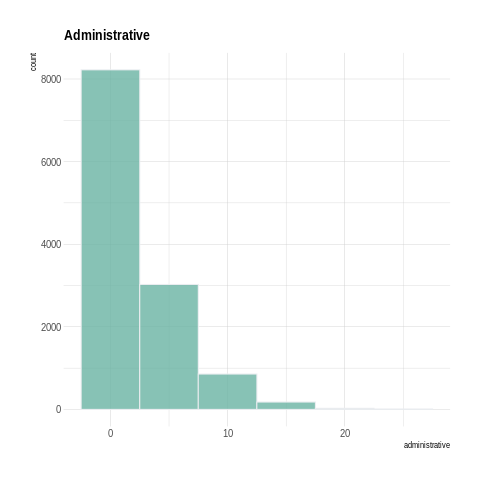

In [27]:
%%R
#Administrative histogram
df_num %>%
 ggplot( aes(x=administrative)) +
    geom_histogram( binwidth=5, fill="#69b3a2", color="#e9ecef", alpha=0.8) +
    ggtitle("Administrative") +
    theme_ipsum() +
    theme(
      plot.title = element_text(size=15)
    )


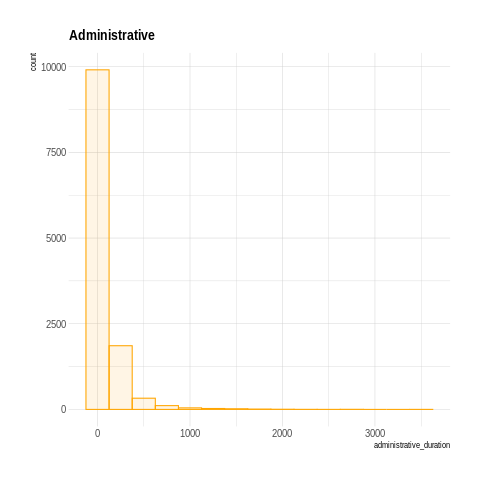

In [28]:
%%R
# administrative_duration
df_num %>%
 ggplot( aes(x=administrative_duration)) +
    geom_histogram( binwidth=250, fill="orange", color="orange", alpha=0.1) +
    ggtitle("Administrative") +
    theme_ipsum() +
    theme(
      plot.title = element_text(size=15)
    )


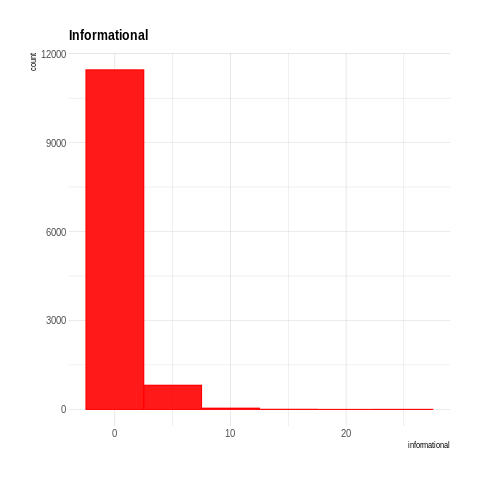

In [29]:
%%R
# informational histogram
df_num %>%
 ggplot( aes(x=informational)) +
    geom_histogram( binwidth=5, fill="red", color="red", alpha=0.9) +
    ggtitle("Informational") +
    theme_ipsum() +
    theme(
      plot.title = element_text(size=15)
    )


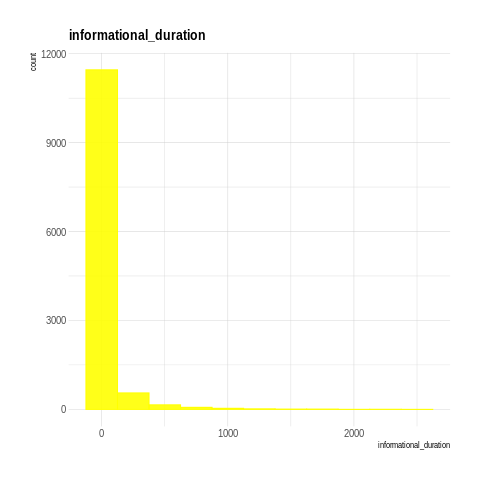

In [30]:
%%R
#informational_duration histogram
df_num %>%
 ggplot( aes(x=informational_duration)) +
    geom_histogram( binwidth=250, fill="yellow", color="yellow", alpha=0.9) +
    ggtitle("informational_duration") +
    theme_ipsum() +
    theme(
      plot.title = element_text(size=15)
    )
  


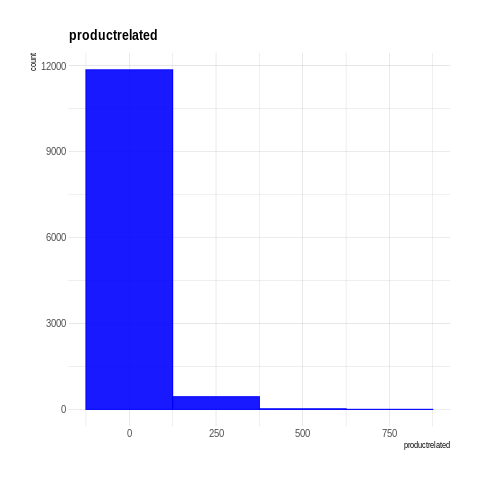

In [31]:
%%R
#productrelated histogram
df_num %>%
 ggplot( aes(x=productrelated)) +
    geom_histogram( binwidth=250, fill="blue", color="blue", alpha=0.9) +
    ggtitle("productrelated") +
    theme_ipsum() +
    theme(
      plot.title = element_text(size=15)
    )


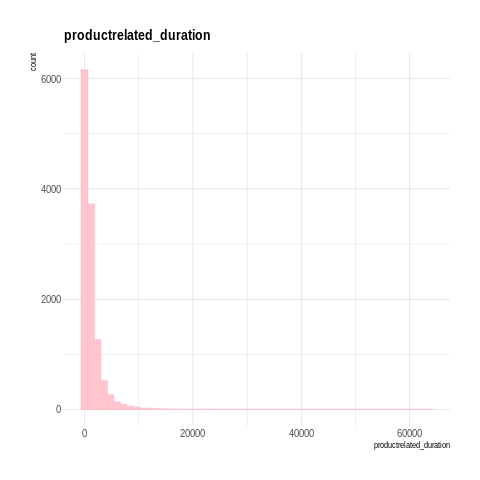

In [32]:
%%R
# productrelated_duration histogram
df_num %>%
 ggplot( aes(x=productrelated_duration)) +
    geom_histogram( binwidth=1200, fill="pink", color="pink", alpha=0.9) +
    ggtitle("productrelated_duration") +
    theme_ipsum() +
    theme(
      plot.title = element_text(size=15)
    )

R[write to console]: `stat_bin()` using `bins = 30`. Pick better value with `binwidth`.



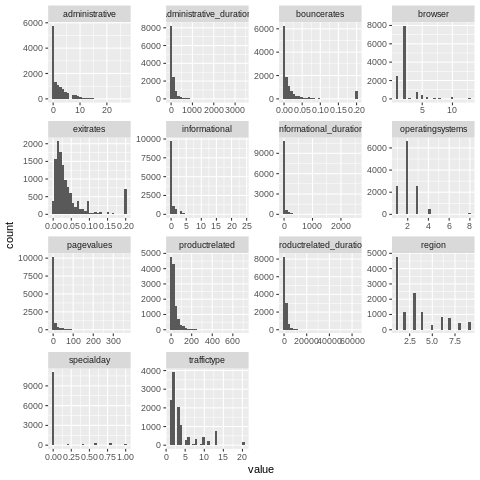

In [33]:
%%R
df %>%
  keep(is.numeric) %>% 
  gather() %>% 
  ggplot(aes(value)) +
    facet_wrap(~ key, scales = "free") +
    geom_histogram()

## Barplots for categorical variables

In [34]:
%%R
df<- dplyr::mutate(df, id = row_number())

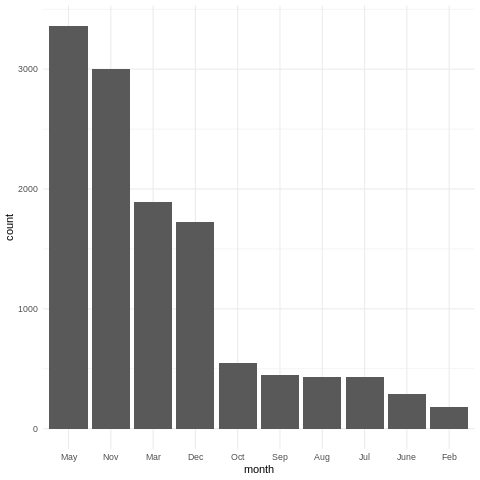

In [35]:
%%R
ggplot(mutate(df, month = fct_infreq(month))) + geom_bar(aes(x = month)) +theme_minimal()

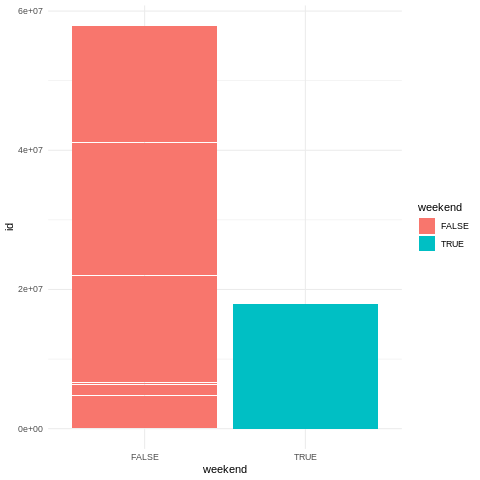

In [36]:
%%R
p<-ggplot(df, aes(x=weekend, y=id, fill=weekend)) +
  geom_bar(stat="identity")+theme_minimal()
p

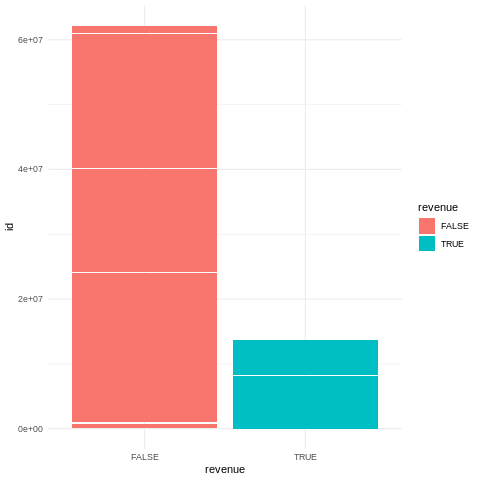

In [37]:
%%R
tp<-ggplot(df, aes(x=revenue, y=id, fill=revenue)) +
  geom_bar(stat="identity")+theme_minimal()
tp

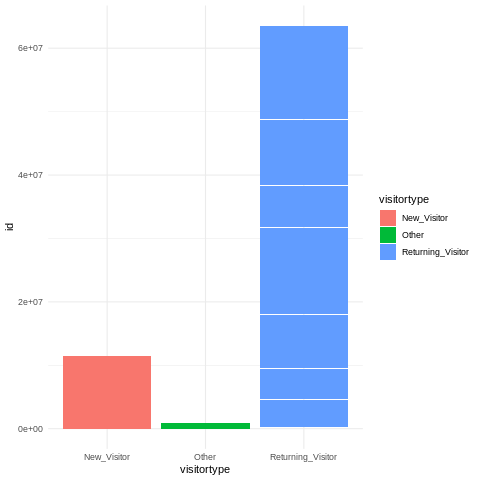

In [38]:
%%R
#visitortype
y<-ggplot(df, aes(x=visitortype, y=id, fill=visitortype)) +
  geom_bar(stat="identity")+theme_minimal()
y

**Numerical Summaries:**

Administrative: Ranges from 0 to 17 with most frequency between 0 and 10
Administrative duration: Ranges from 1 to 3,389 seconds with more frequencies below 1000 seconds.

Informational: Range from 0 to 24 pages with most frequencies between 0 and 5

Informational duration: Range from 1 to 2549 with most frequencies between  0 to 500 seconds

Product Related: Range from 0 to 700 seconds with most frequencies above 100 seconds

Product Related Duration: Range from 1 to 63,375 seconds with most frequencies above 10000 seconds

**Categorical Summaries**
Months:  The months with highest records include- May, November, March and December

Weekends: Most entries were on weekdays

Revenue: Most of site visits did not bring revenue as expected

Visitor Type: Most return customers visited the site


# Chapter Five: Bivariate Analysis

In [39]:
%%R
corr<-cor(df_num)
corr

                        administrative administrative_duration informational
administrative             1.000000000             0.601466169   0.376781907
administrative_duration    0.601466169             1.000000000   0.302646624
informational              0.376781907             0.302646624   1.000000000
informational_duration     0.255756989             0.237958597   0.618965149
productrelated             0.430832402             0.288869393   0.374097712
productrelated_duration    0.373646961             0.355238452   0.387446219
bouncerates               -0.223473560            -0.144128305  -0.116070836
exitrates                 -0.316192240            -0.205618430  -0.163538534
pagevalues                 0.098771209             0.067462517   0.048538829
specialday                -0.095053675            -0.073472322  -0.048328300
operatingsystems          -0.006458621            -0.007424958  -0.009434632
browser                   -0.025242556            -0.015524938  -0.038256506

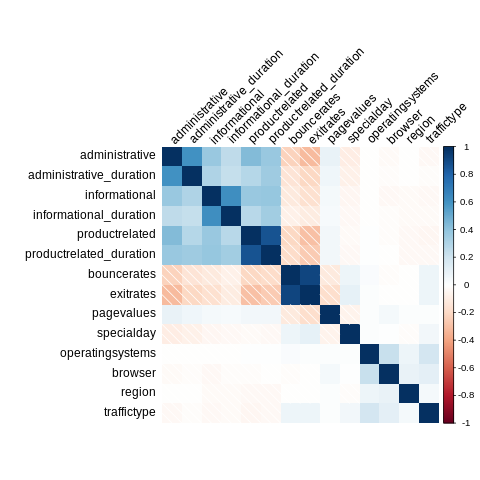

In [40]:
%%R
#Visualizing the Correlation Matrix.
corrplot(cor(df_num), method="shade", tl.col="black", tl.srt=45)

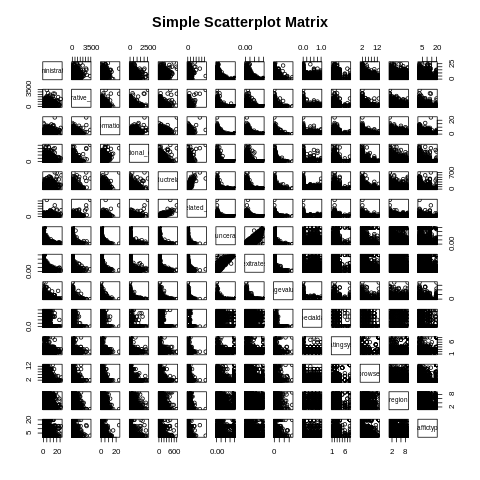

In [41]:
%%R
# Basic Scatterplot Matrix

pairs(~administrative+administrative_duration+informational+informational_duration+productrelated+productrelated_duration+
bouncerates+exitrates+pagevalues+specialday+operatingsystems+browser+region+traffictype,data=df,
   main="Simple Scatterplot Matrix")

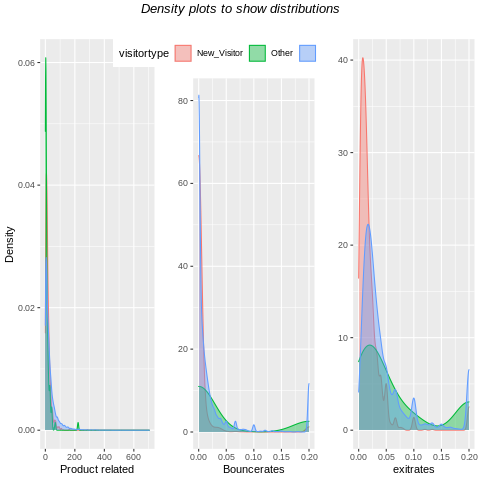

In [42]:
%%R
# Plotting density plots to check for distributions
options(repr.plot.width = 11, repr.plot.height = 5)
p1 = ggplot(df, aes(productrelated, col = visitortype)) + 
  geom_density(aes(fill = visitortype), alpha = 0.4) + 
  labs(x = 'Product related', y = 'Density', title = '') + 
  theme(legend.position = 'none', 
       plot.title = element_text(size = 12)) 

p2 = ggplot(df, aes(bouncerates, col = visitortype)) + 
  geom_density(aes(fill = visitortype), alpha = 0.4) + 
  labs(x = 'Bouncerates', y = '', title = '') + 
  theme(legend.position = 'top') 

p3 = ggplot(df, aes(exitrates, col = visitortype)) + 
  geom_density(aes(fill = visitortype), alpha = 0.4) + 
  labs(x = 'exitrates', y = '', title = '') + 
  theme(legend.position = 'none', 
       plot.title = element_text(size = 12)) 

grid.arrange(p1, p2, p3, ncol = 3, top = textGrob("Density plots to show distributions",gp=gpar(fontsize=13,font=3, color = 'darkmagenta')))

# Chapter Six: Feature Engineering

In [43]:
%%R
# Encoding categorical variables
months = data.frame(model.matrix(~0+df$month))
weekends = data.frame(model.matrix(~0+df$weekend))
revenue_ = data.frame(model.matrix(~0+df$revenue))
visitortype_ = data.frame(model.matrix(~0+df$visitortype))
# Dropping columns which have already encoded
drop_cols = c('month', 'visitortype', 'weekend', 'revenue')
df = select(data.frame(cbind(df, months, weekends, revenue_, visitortype_)), -drop_cols)

R[write to console]: Note: Using an external vector in selections is ambiguous.
ℹ Use `all_of(drop_cols)` instead of `drop_cols` to silence this message.
ℹ See <https://tidyselect.r-lib.org/reference/faq-external-vector.html>.
This message is displayed once per session.



#Chapter Seven: Unsupervised Machine Learning

## K- Means Clustering


K-means clustering is a type of unsupervised learning, which is used with unlabeled dataset. The goal of this algorithm is to find K groups in the data. The algorithm works iteratively to assign each data point to one of K groups based on the features that are provided. Data points are clustered based on feature similarity. The results of the K-means clustering algorithm are:

The centroids of the K clusters, which can be used to label new data
Labels for the training data (each data point is assigned to a single cluster)
K-means works by defining spherical clusters that are separable in a way so that the mean value converges towards the cluster center. Because of this, K-Means may underperform sometimes.

Use Cases:

* Document Classification
* Delivery Store Optimization
* Customer Segmentation
* Insurance Fraud Detection etc.

In [44]:
%%R
#Scaling the data
df_scaled<- scale(df)


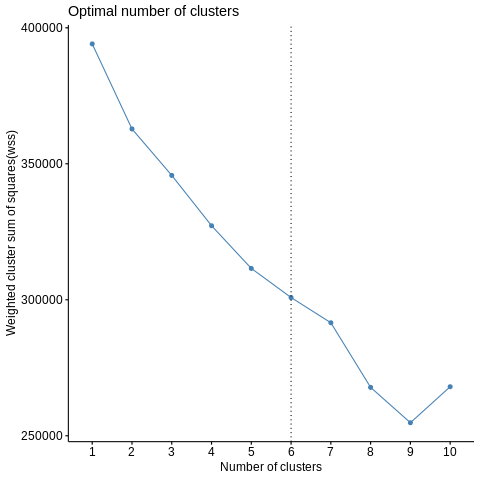

In [45]:
%%R
# Finding the optimal number of clusters using the elbow method
options(repr.plot.width = 6, repr.plot.height = 5)
fviz_nbclust(df_scaled, kmeans, method = 'wss') + 
  geom_vline(xintercept = 6, linetype = 3) + 
  labs(x = 'Number of clusters', y = 'Weighted cluster sum of squares(wss)')

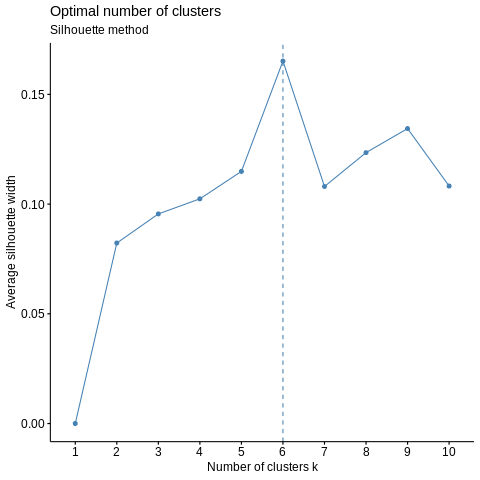

In [46]:
%%R
# Silhouette method
fviz_nbclust(df_scaled, kmeans, method = "silhouette")+
  labs(subtitle = "Silhouette method")

In [48]:
%%R
# Performing clustering with the optimal number of clusters
kmeans_res = kmeans(df_scaled, 6)

# Checking the cluster centers of each variable
kmeans_res$centers

  administrative administrative_duration informational informational_duration
1     0.14292986              0.06696038    0.00264533             -0.0466728
2     0.07338667              0.02308207   -0.15884746             -0.1420279
3    -0.42131184             -0.30744774   -0.27130338             -0.2048993
4     1.61319790              1.45610006    1.51701755              1.2301078
5     1.54438365              1.03093007    1.72304371              1.4663559
6    -0.30115582             -0.25171900   -0.25876537             -0.2022952
  productrelated productrelated_duration bouncerates   exitrates  pagevalues
1     0.07259231              0.08135871  -0.3600405 -0.48486675  1.29534552
2    -0.35957294             -0.35219721  -0.3021441 -0.37759030 -0.26230846
3    -0.33140437             -0.31498605   1.0477564  0.99495072 -0.27229228
4     0.64854352              0.58154478  -0.3010161 -0.44317968  0.04800353
5     4.09186845              3.91560719  -0.3485688 -0.51680501  0.0

In [49]:
%%R
# Previewing the size of observations in each cluster
kmeans_res$size

[1] 1703 1314 2399 1112  336 5452


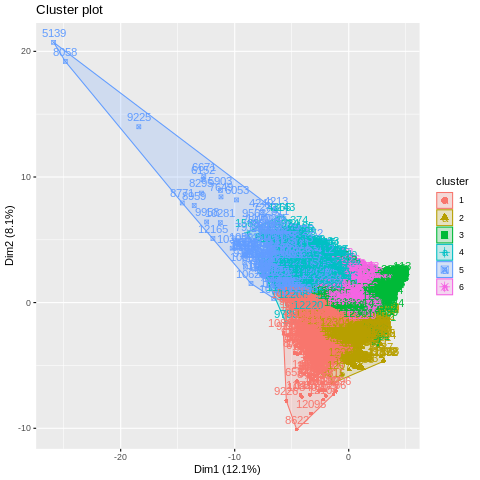

In [50]:
%%R
# Visualising the clusters of the whole dataset
options(repr.plot.width = 11, repr.plot.height = 6)
fviz_cluster(kmeans_res, df)

## Heirarchical Clustering

Hierarchical clustering, also known as hierarchical cluster analysis, is an algorithm that groups similar objects into groups called clusters. The endpoint is a set of clusters, where each cluster is distinct from each other cluster, and the objects within each cluster are broadly similar to each other.

In [51]:
%%R
dist_mat <- dist(df_scaled, method = 'euclidean')

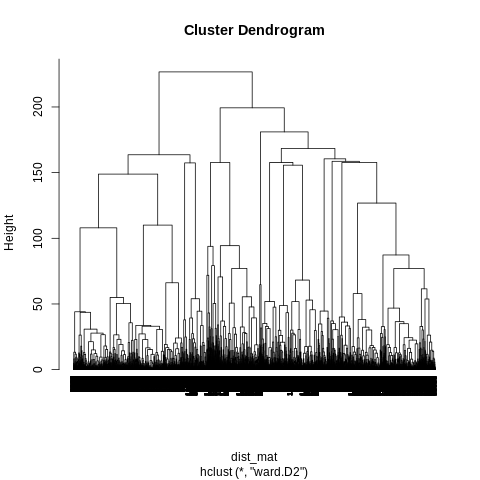

In [52]:
%%R
# The euclidean distance and the ward2 method has been used to perform hierachical clustering
hc = hclust(dist_mat, method = 'ward.D2')

# Visualizing the hierachical dendogram
options(repr.plot.width = 20, repr.plot.height = 8)
plot(hc, cex = 0.6, hang = -1)

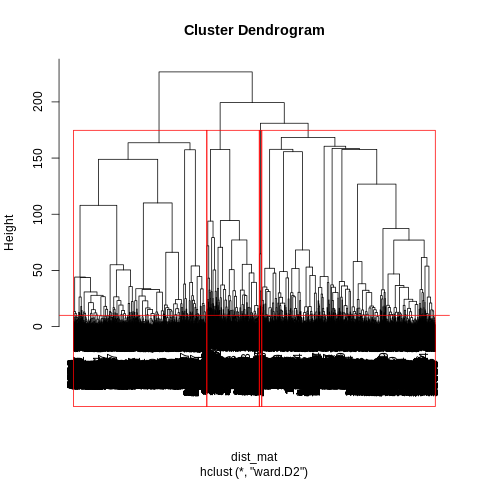

In [53]:
%%R
#Checking the number of clusters that can fit
options(repr.plot.width = 20, repr.plot.height = 8)
plot(hc)
rect.hclust(hc , k = 4, border = 2:2)
abline(h = 10, col = 'red')

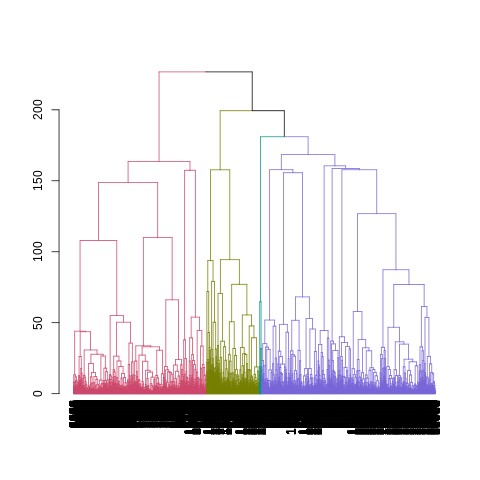

In [54]:
%%R
suppressPackageStartupMessages(library(dendextend))
hcd <- as.dendrogram(hc)
avg_col_dend <- color_branches(hcd, h = 170)
plot(avg_col_dend)

# Chapter Eight: Conclusions and Recommendations

**Conclusion**
The best performing model was kmeans clustering . This maybe the case since kmeans through elbow method and silhoette method points out the number of clusters more clearly

**Recommendation **
Highly recommend the use of kmeans clustering to be deployed in the company inorder to identify the different customer segmentations appropriately
